# Task 3-1

Build “vanilla” and “deep” autoencoders on Fashion MNIST dataset. Play with architecture and training hyper-parameters. Compare performance and visualize the results (based on several test samples).   

In [2]:
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.python.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
import pandas as pd

In [3]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
# X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

In [5]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [6]:
X_train.shape

(60000, 784)

In [7]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

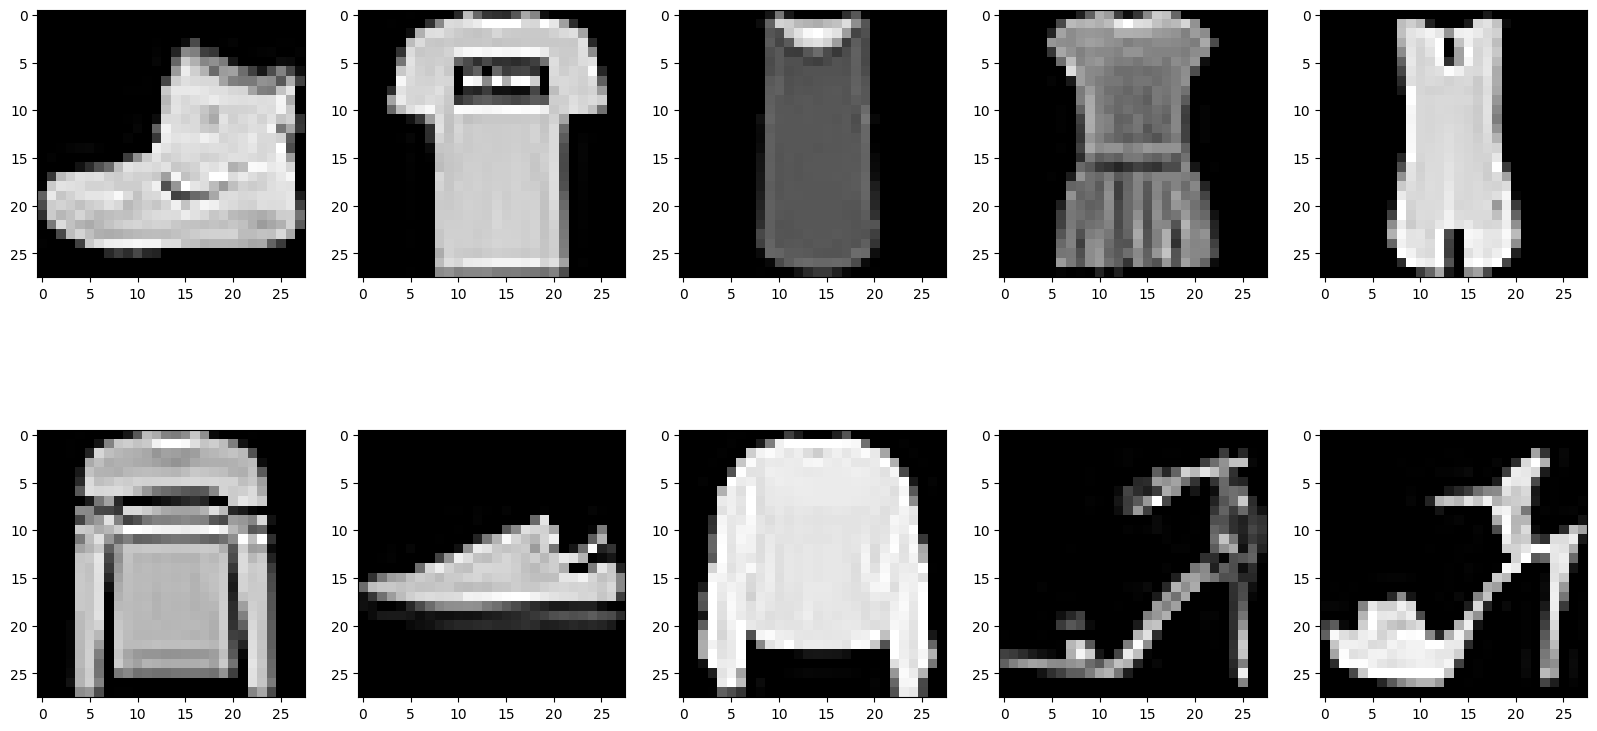

In [8]:
fig, ax = plt.subplots(2 ,5, figsize=(20,10))
for ax, sample in list(zip(ax.flatten(), X_train[:10])):
    img = np.array(sample, dtype='float')
    pixels = img.reshape((28, 28))
    ax.imshow(pixels, cmap='gray')
plt.show()

### Vanila AE

In [9]:
def get_vanilla_autoencoder() -> Model:
    input_layer = Input(shape=(784,))
    latent_view = Dense(32, activation='sigmoid')(input_layer)
    output_layer = Dense(784)(latent_view)
    model = Model(input_layer, output_layer)
    return model

In [10]:
vanilla_AE_model = get_vanilla_autoencoder()
vanilla_AE_model.compile(optimizer='adam', loss='mse')
history_vanilla_AE = vanilla_AE_model.fit(
    X_train, X_train, 
    epochs=80, 
    batch_size=256, 
    shuffle=True, 
    verbose=2, 
    validation_data=(X_test, X_test), 
    callbacks=[early_stop]
)

Epoch 1/80
235/235 - 1s - loss: 0.0667 - val_loss: 0.0417
Epoch 2/80
235/235 - 1s - loss: 0.0351 - val_loss: 0.0304
Epoch 3/80
235/235 - 1s - loss: 0.0278 - val_loss: 0.0254
Epoch 4/80
235/235 - 1s - loss: 0.0237 - val_loss: 0.0223
Epoch 5/80
235/235 - 1s - loss: 0.0212 - val_loss: 0.0202
Epoch 6/80
235/235 - 1s - loss: 0.0195 - val_loss: 0.0188
Epoch 7/80
235/235 - 1s - loss: 0.0183 - val_loss: 0.0178
Epoch 8/80
235/235 - 1s - loss: 0.0175 - val_loss: 0.0172
Epoch 9/80
235/235 - 1s - loss: 0.0169 - val_loss: 0.0168
Epoch 10/80
235/235 - 1s - loss: 0.0166 - val_loss: 0.0165
Epoch 11/80
235/235 - 1s - loss: 0.0164 - val_loss: 0.0164
Epoch 12/80
235/235 - 1s - loss: 0.0163 - val_loss: 0.0162
Epoch 13/80
235/235 - 1s - loss: 0.0161 - val_loss: 0.0161
Epoch 14/80
235/235 - 1s - loss: 0.0160 - val_loss: 0.0160
Epoch 15/80
235/235 - 1s - loss: 0.0159 - val_loss: 0.0160
Epoch 16/80
235/235 - 1s - loss: 0.0159 - val_loss: 0.0159
Epoch 17/80
235/235 - 1s - loss: 0.0158 - val_loss: 0.0158
Epoch 

In [12]:
n = 10 # how many pictures we will 'predict'

In [13]:
to_predict = X_test[:n]

# Encode test images into 64-dimensional representation
encoded_imgs_vanilla = vanilla_AE_model.predict(to_predict)
# Decode encoded images back to original size
decoded_imgs_vanilla = vanilla_AE_model.predict(encoded_imgs_vanilla)

In [14]:
def plot_enc_dec(imgs, enc_imgs, dec_imgs):
    fig, ax = plt.subplots(3, n, figsize=(16, 4))
    for i in range(n):
        ax[0][i].imshow(imgs[i].reshape(28, 28))
        plt.gray()
        ax[1][i].imshow(enc_imgs[i].reshape(28, 28))
        plt.gray()
        ax[2][i].imshow(dec_imgs[i].reshape(28, 28))
        plt.gray()
    plt.show()


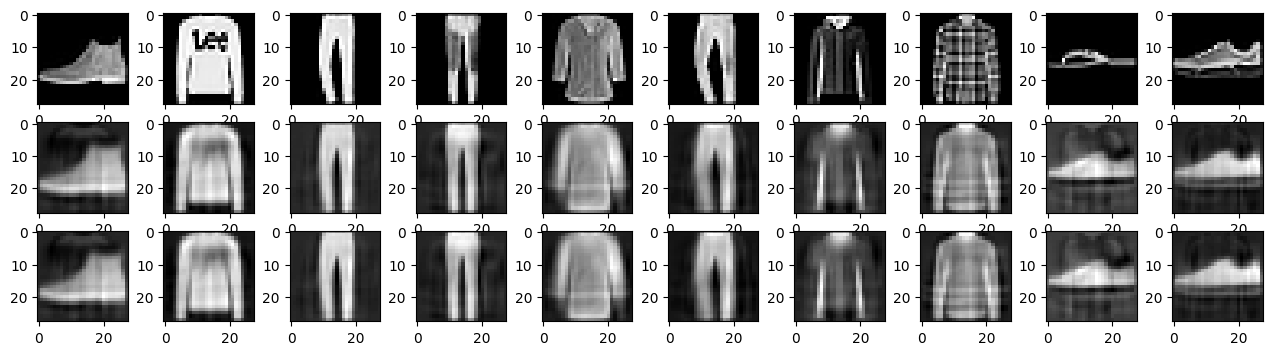

In [16]:
plot_enc_dec(to_predict, encoded_imgs_vanilla, decoded_imgs_vanilla)

### Deep AE

In [17]:
def get_deep_autoencoder():
    input_layer = Input(shape=(784,))
    encode_layer1 = Dense(512, activation='relu')(input_layer)
    encode_layer2 = Dense(256, activation='relu')(encode_layer1)
    encode_layer3 = Dense(128, activation='relu')(encode_layer2)
    latent_view = Dense(64, activation='sigmoid')(encode_layer3)
    decode_layer1 = Dense(128, activation='relu')(latent_view)
    decode_layer2 = Dense(256, activation='relu')(decode_layer1)
    decode_layer3 = Dense(512, activation='relu')(decode_layer2)
    output_layer = Dense(784)(decode_layer3)
    model = Model(input_layer, output_layer)
    return model


In [18]:
deep_AE_model = get_deep_autoencoder()
deep_AE_model.compile(optimizer='adam', loss='mse')
history_deep_AE = deep_AE_model.fit(X_train, X_train, epochs=80, batch_size=256, shuffle=True, verbose=2, validation_data=(X_test, X_test), callbacks=[early_stop])

Epoch 1/80
235/235 - 5s - loss: 0.0410 - val_loss: 0.0245
Epoch 2/80
235/235 - 4s - loss: 0.0219 - val_loss: 0.0195
Epoch 3/80
235/235 - 3s - loss: 0.0183 - val_loss: 0.0173
Epoch 4/80
235/235 - 3s - loss: 0.0164 - val_loss: 0.0160
Epoch 5/80
235/235 - 3s - loss: 0.0153 - val_loss: 0.0152
Epoch 6/80
235/235 - 3s - loss: 0.0144 - val_loss: 0.0140
Epoch 7/80
235/235 - 3s - loss: 0.0138 - val_loss: 0.0135
Epoch 8/80
235/235 - 3s - loss: 0.0132 - val_loss: 0.0129
Epoch 9/80
235/235 - 3s - loss: 0.0128 - val_loss: 0.0127
Epoch 10/80
235/235 - 3s - loss: 0.0124 - val_loss: 0.0124
Epoch 11/80
235/235 - 3s - loss: 0.0121 - val_loss: 0.0120
Epoch 12/80
235/235 - 4s - loss: 0.0119 - val_loss: 0.0118
Epoch 13/80
235/235 - 4s - loss: 0.0115 - val_loss: 0.0117
Epoch 14/80
235/235 - 3s - loss: 0.0113 - val_loss: 0.0115
Epoch 15/80
235/235 - 3s - loss: 0.0111 - val_loss: 0.0112
Epoch 16/80
235/235 - 3s - loss: 0.0109 - val_loss: 0.0111
Epoch 17/80
235/235 - 3s - loss: 0.0108 - val_loss: 0.0111
Epoch 

In [19]:
to_predict = X_test[:n]

# Encode test images into 64-dimensional representation
encoded_imgs_deep = deep_AE_model.predict(to_predict)
# Decode encoded images back to original size
decoded_imgs_deep = deep_AE_model.predict(encoded_imgs_deep)

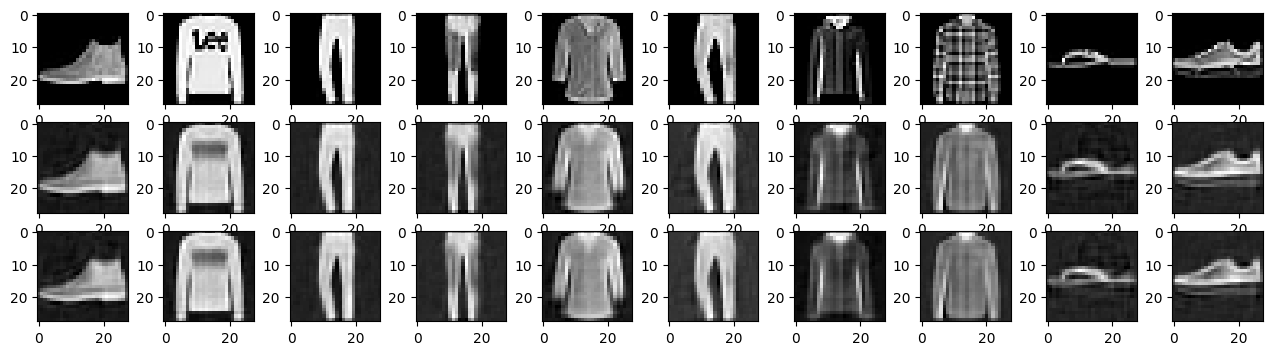

In [20]:
plot_enc_dec(to_predict, encoded_imgs_deep, decoded_imgs_deep)